In [2]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit': '0.46.0', 'qiskit-aer': '0.13.3', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.7.1', 'qiskit-finance': '0.4.0', 'qiskit-optimization': '0.6.0', 'qiskit-machine-learning': None}

In [3]:
from qiskit import Aer

In [4]:
from qiskit import *
import pylatexenc


In [5]:
import random

def generate_unique_random_ints(x, y):
    if x > y:
        raise ValueError("x must be less than or equal to y")
    random_ints = random.sample(range(y + 1), x)
    return random_ints


In [7]:
def generate_unique_random_pairs(n, x, qulist):
    entanglementpairlist = []
    for i in range(n):
        while True:
            random_control = random.randint(0, x)
            
            while True:
                if random_control in qulist:  #if control qubit is non-zero
                     break
                random_control = random.randint(0, x) #if zero, keep generate new control bit

            random_target = random.randint(0, x) #generate target bit
            qulist.append(random_target)
            while True:
                if random_target != random_control:
                    break
                random_target = random.randint(0, x) #generate a target which is not identical to the control

            entanglement = [random_control, random_target]
            
            pairexist = False
            for sublist in entanglementpairlist: #check whether this pair exists
                if sublist == entanglement:
                    pairexist = True
                    break

            if pairexist == False:
                entanglementpairlist.append(entanglement)
                break;

    return entanglementpairlist



In [2]:
 #quantum circuit with 5 qubits and 4 classical bits

import random
from math import pi

k = 3
l = 4
m = 3

def runqc(params):
    qc = QuantumCircuit(4, 4) #initialize circuit
    qulist = []
    for j in range(l):
        random_integers = generate_unique_random_ints(k, 3) #randomly chose k in 0-3
        qulist += random_integers
        ##print(qulist)
        for randomQubit in range(k):
            qc.u(params[0]*pi, params[1]*pi, params[2]*pi, random_integers[randomQubit]) #add u3 gate

        entanglementpair = generate_unique_random_pairs(m, 3, qulist)
        print(entanglementpair)
        for randomPair in range(m):
            qc.cx(entanglementpair[randomPair][0], entanglementpair[randomPair][1]) #create entanglement


    backend = AerSimulator()
    transpiled_qc = transpile(qc, backend)
    result = backend.run(transpiled_qc).result()
    statevector = Statevector(result.get_statevector())
    return statevector


In [ ]:
import numpy as np
def CFI(params):
    shift = pi/2
    val_num = 6 * k * l
    fisher_info = np.zeros((val_num, val_num))

    for i in range(val_num):
        for j in range(val_num):
            if i == j:
                param_up = params[i][0]


In [3]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import SPSA, SLSQP, COBYLA
from qiskit.primitives import Sampler, Estimator

def objective_function(params, t_val, toverhead, Tunit):
    cfi_phi = CFI(params)
    t_plus = t_val + toverhead
    opt_result = Tunit * (t_val**2) * cfi_phi / t_plus
    return opt_result

def run_optimizer(params, prev):
    toverhead = 0.1  # Overhead parameter
    Tunit = 1.0  # Unit time
    
    
    sampler = Sampler()
    
    # Define initial guess for parameters
    initial_params = np.array([0.5, 0.5, 0.5])
    
    # Choose the optimizer
    # optimizer = Powell(maxiter=100)
    optimizer = COBYLA(maxiter=500)
    
    # Run the optimization
    result = optimizer.minimize(fun=objective_function, x0=initial_params)
    
    # Extract the optimized parameters
    optimized_params = result[0]
    max_value = -result[1]
    if(max_value > prev):
        return max_value
    else:
        return -999

    

C:\Users\18016\AppData\Local\Temp\ipykernel_18564\2766924912.py:4: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SPSA, SLSQP, COBYLA


In [8]:
from qiskit import QuantumCircuit
# Import Aer (this is our simulator package)
from qiskit import Aer
# Import plot histogram (this is needed to plot counts)
from qiskit.visualization import plot_histogram


qc = QuantumCircuit(5, 5) #quantum circuit with 5 qubits and 4 classical bits

qc.h(0)
qc.h(1)
qc.h(3)

qc.barrier(0,1,2,3,4)
# # qc.cx(0, 1)
qc.measure([0,1,2,3,4], [0,1,2,3,4])
qc.draw()


┌───┐ ░ ┌─┐            
q_0: ┤ H ├─░─┤M├────────────
     ├───┤ ░ └╥┘┌─┐         
q_1: ┤ H ├─░──╫─┤M├─────────
     └───┘ ░  ║ └╥┘┌─┐      
q_2: ──────░──╫──╫─┤M├──────
     ┌───┐ ░  ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─░──╫──╫──╫─┤M├───
     └───┘ ░  ║  ║  ║ └╥┘┌─┐
q_4: ──────░──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║ └╥┘
c: 5/═════════╩══╩══╩══╩══╩═
              0  1  2  3  4

C:\Users\18016\AppData\Local\Temp\ipykernel_27632\73726698.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend_sim = Aer.get_backend('qasm_simulator')


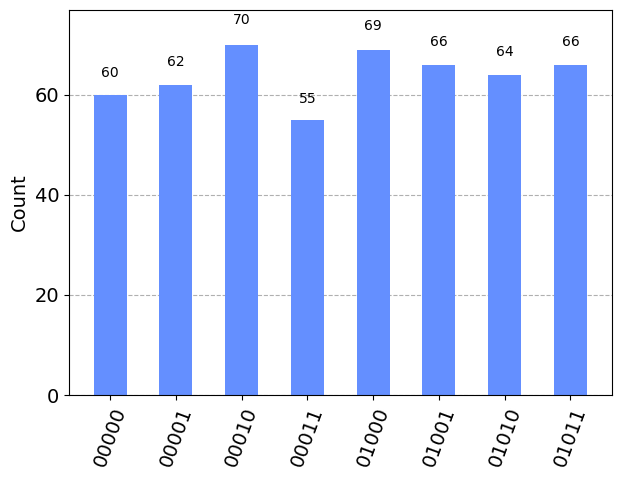

In [19]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
qexe = transpile(qc, backend_sim)
job_sim = backend_sim.run(qexe, shots=512)
result_sim = job_sim.result()
counts = result_sim.get_counts()
plot_histogram(counts)

In [27]:
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [42]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [70]:
def qft(qc, n):
    for qubit_temp in range(n):
        qc.h(qubit_temp)
        for num in range(qubit_temp):
            qc.cp(pi/2**(qubit_temp - num),num , qubit_temp)


In [64]:
qc = QuantumCircuit(4)
QFT_single_qubit(qc, 4)
qc.draw()

┌───┐                                                      
q_0: ┤ H ├─■────────■─────────────────■─────────────────────────
     ├───┤ │P(π/2)  │                 │                         
q_1: ┤ H ├─■────────┼────────■────────┼────────■────────────────
     ├───┤          │P(π/4)  │P(π/2)  │        │                
q_2: ┤ H ├──────────■────────■────────┼────────┼────────■───────
     ├───┤                            │P(π/8)  │P(π/4)  │P(π/2) 
q_3: ┤ H ├────────────────────────────■────────■────────■───────
     └───┘

In [71]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [72]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

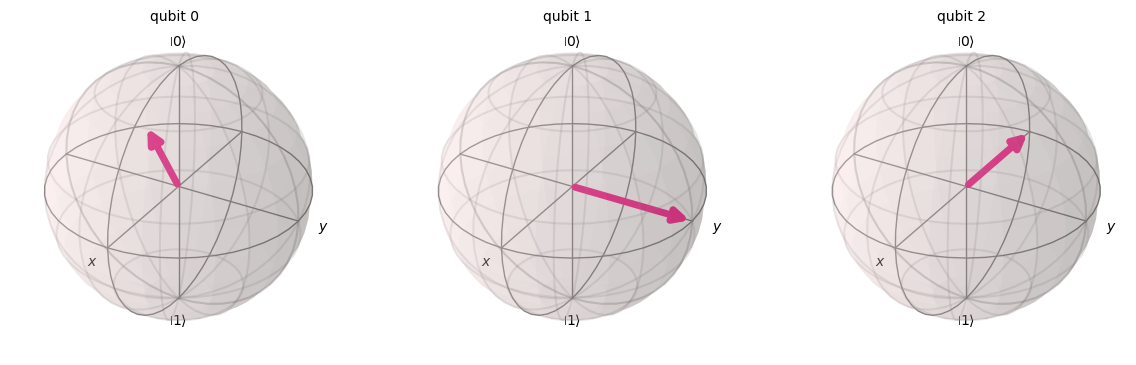

In [74]:

qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [78]:


qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

NameError: name 'qft_rotations' is not defined

In [79]:

def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘

In [80]:
scalable_circuit(qft_rotations)

C:\Users\18016\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb2\x00\x00\x01o\x08\x06\x00\x00\x00\x9f\n=o\x00…

In [81]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw()

┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [83]:

scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x05\x00\x00\x01o\x08\x06\x00\x00\x00j\xc2\xcb.\x…

In [84]:
bin(5)

'0b101'

In [85]:

# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

In [86]:
qft(qc,3)
qc.draw()

┌───┐                                     ┌───┐   
q_0: ┤ X ├──────■──────────────────────■───────┤ H ├─X─
     └───┘      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ───────────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘

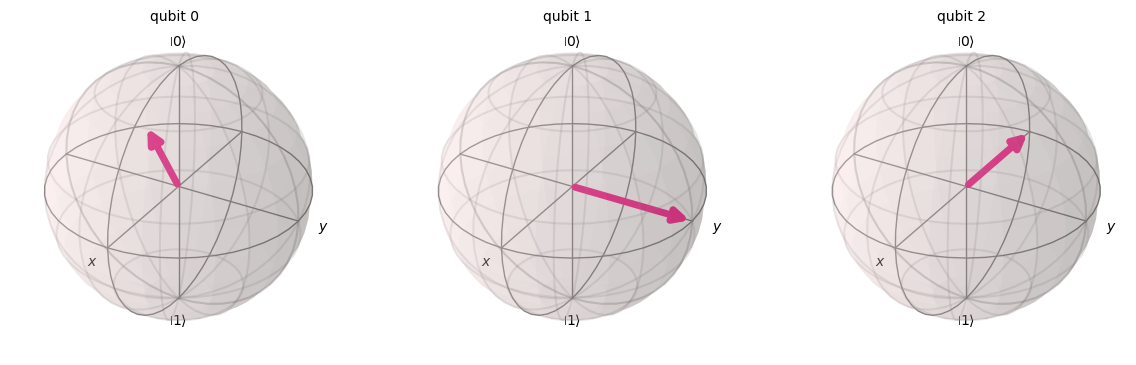

In [87]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [88]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [89]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

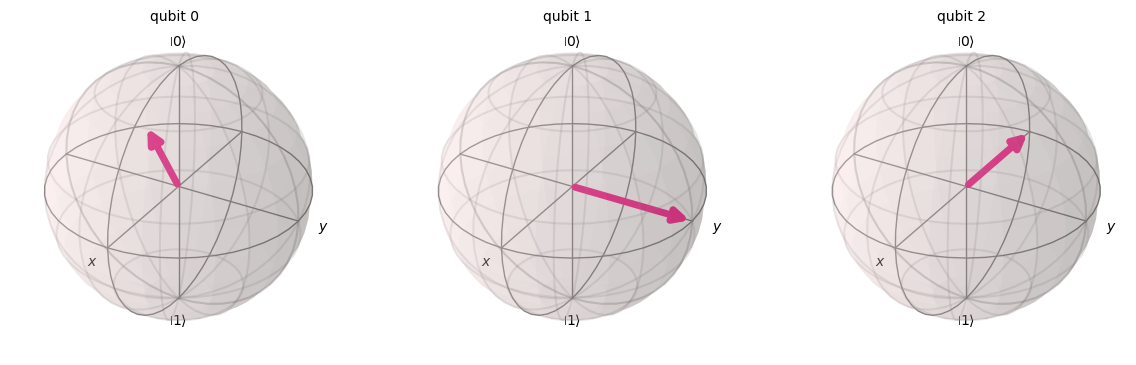

In [90]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [91]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,5π/4) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,5π/2) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,5π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

In [96]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibm_osaka


In [93]:
from qiskit import IBMQ

In [95]:
IBMQ.save_account('0758b5f3a1ba1e20a8b91ace2f8ae2e5f4d572fd837bf3bd065b2585447cc243ce92d3c2b06f54bf29d8c8e296184aaf73867b5a451070a479287b5feba4dd14')

In [98]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)